In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys
import time

In [4]:
def getSizeInMb(object):
  return sys.getsizeof(object) / 1024 / 1024

In [5]:
def getRandomWordInText(text):
  words = text.split(" ")
  return words[np.random.randint(0, len(words))]

## ALGORITHMS

### Z ALGORITHM

In [6]:
def getZarr(string, z):
  n = len(string)
  l, r, k = 0, 0, 0
  for i in range(1, n):
    if i > r:
      l, r = i, i
      while r < n and string[r - l] == string[r]:
        r += 1
      z[i] = r - l
      r -= 1
    else:
      k = i - l
      if z[k] < r - i + 1:
        z[i] = z[k]
      else:
        l = i
        while r < n and string[r - l] == string[r]:
          r += 1
        z[i] = r - l
        r -= 1

In [7]:
def Z(text, pattern):
  concat = pattern + "$" + text
  l = len(concat)

  z = [0] * l
  getZarr(concat, z)

  occurrences = []
  for i in range(l):
    if z[i] == len(pattern):
      occurrences.append(i - len(pattern) - 1)
  return occurrences

In [8]:
# PRUEBAS
text = "Hola mundo, hol mundos, holas mundo, mundo hola"
pattern = "mundo"
print(Z(text, pattern))

[5, 16, 30, 37]


### ANAGRAM SEARCH

In [9]:
MAX=256

def compare(arr1, arr2):
  for i in range(MAX):
    if arr1[i] != arr2[i]:
      return False
  return True

In [10]:
MAX=256

def Anagram(pattern, text):

  M = len(pattern)
  N = len(text)
  occurrences =[]

  countP = [0]*MAX
  countTW = [0]*MAX

  for i in range(M):
    (countP[ord(pattern[i]) ]) += 1
    (countTW[ord(text[i]) ]) += 1

  for i in range(M,N):
    if compare(countP, countTW):
      occurrences.append(i-M)

    (countTW[ ord(text[i]) ]) += 1 #Añadir un caracter 
    (countTW[ ord(text[i-M]) ]) -= 1 #Eliminar el primer caracter
    
  if compare(countP, countTW):
      occurrences.append(N-M)

  return occurrences

In [11]:
# PRUEBAS
text = "Hola mundo, hol mundos, holas mundo, mundo hola"
pattern = "mundo"
Anagram(pattern, text)

[5, 16, 30, 37]

## LOADING DATA

In [34]:
base_path = os.path.dirname(os.getcwd())
data_path = os.path.join(base_path, "data\datanews_summary_more.csv")

data = pd.read_csv(data_path)
data = data.drop("headlines", axis=1)

data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\Workspace\\Edu\\Proyectos\\StringSearchingAlgorithms\\data\\datanews_summary_more.csv'

In [11]:
data_25 = data.sample(frac=0.25)
data_50 = data.sample(frac=0.50)
data_75 = data.sample(frac=0.75)
data_100 = data

In [12]:
str_25 = " ".join(data_25.text)
str_50 = " ".join(data_50.text)
str_75 = " ".join(data_75.text)
str_100 = " ".join(data_100.text)

In [13]:
# redondear a 2 decimales
print(f"Size of str_25: {getSizeInMb(str_25)} MB")
print(f"Size of str_50: {getSizeInMb(str_50)} MB")
print(f"Size of str_75: {getSizeInMb(str_75)} MB")
print(f"Size of str_100: {getSizeInMb(str_100)} MB")

Size of str_25: 8.395519256591797 MB
Size of str_50: 16.79727077484131 MB
Size of str_75: 25.194344520568848 MB
Size of str_100: 33.587018966674805 MB


In [14]:
final_data = [
  [str_25, [getRandomWordInText(str_25) for _ in range(5)]],
  [str_50, [getRandomWordInText(str_50) for _ in range(5)]],
  [str_75, [getRandomWordInText(str_75) for _ in range(5)]],
  [str_100, [getRandomWordInText(str_100) for _ in range(5)]]
]
str_data = [str_25, str_50, str_75, str_100]

## METHODOLOGY

In [15]:
str_names = "str_25, str_50, str_75, str_100".split(", ")

In [16]:
# 3m de ejecucion
z_results = []

for text, words in final_data:
  result = []
  
  for word in words:
    start_time = time.time()
    Z(text, word)
    end_time = time.time()
 
    execution_time = end_time - start_time
    result.append(execution_time)
  
  z_results.append(result)
  print(" OK! \n")


 OK! 

 OK! 

 OK! 

 OK! 



In [17]:
str_names = "str_25, str_50, str_75, str_100".split(", ")

In [18]:
#35m
anagram_results = []

for text, words in final_data:
  result = []
  
  for word in words:
    start_time = time.time()
    Anagram(word, text)
    end_time = time.time()
 
    execution_time = end_time - start_time
    result.append(execution_time)
  
  anagram_results.append(result)
  print(" OK! \n")

 OK! 

 OK! 

 OK! 

 OK! 



## RESULTS

In [19]:
colors = ["#92283e", "#336353", "#f0783e", "#436879", "#715948"]

Text(0.5, 1.0, 'Size in MB per sample')

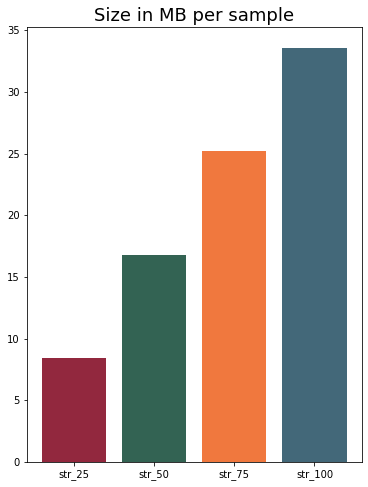

In [20]:
fig, ax = plt.subplots(figsize=(6,8))
datasets_size = [getSizeInMb(x) for x in str_data]
ax.bar(str_names, datasets_size, width=0.8, color=colors)
ax.set_title('Size in MB per sample', loc='center', fontsize=18)

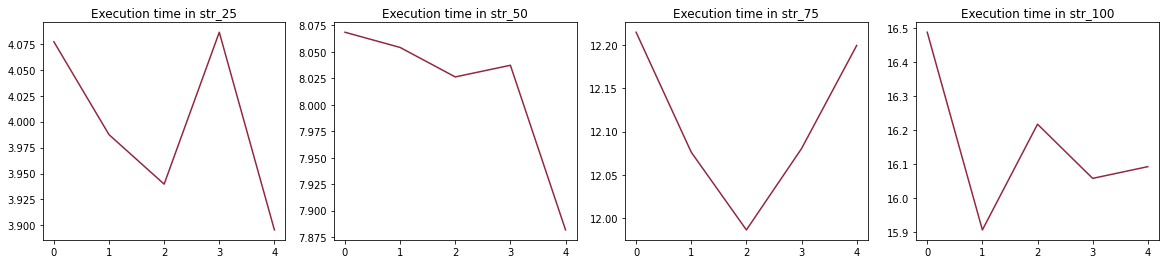

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
for i in range(len(axs)):
  ax = axs[i]
  ax.plot(z_results[i], color=colors[0])
  ax.set_title(f"Execution time in {str_names[i]}")

Text(0.5, 1.0, 'Mean execution time per dataset')

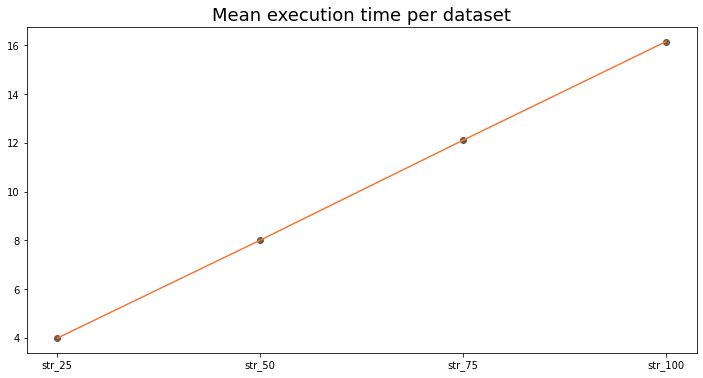

In [22]:
z_mean = [np.mean(i) for i in z_results]
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(4), z_mean, color=colors[4])
ax.plot(str_names, z_mean, color=colors[2])
ax.set_title("Mean execution time per dataset", loc='center', fontsize=18)

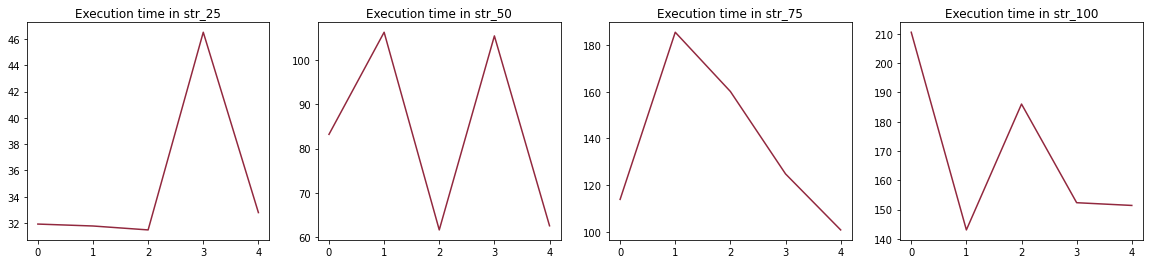

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
for i in range(len(axs)):
  ax = axs[i]
  ax.plot(anagram_results[i], color=colors[0])
  ax.set_title(f"Execution time in {str_names[i]}")

Text(0.5, 1.0, 'Mean execution time per dataset')

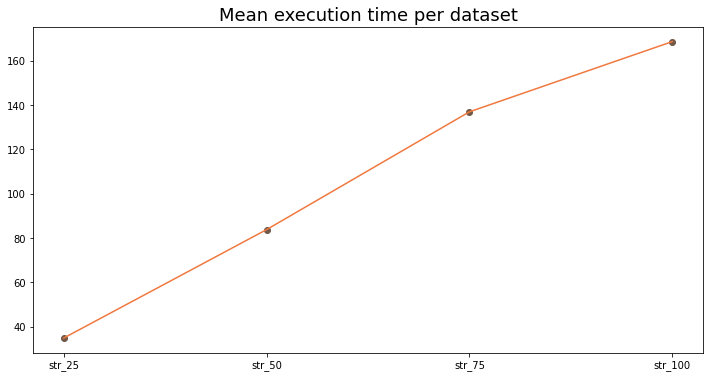

In [24]:
anagram_mean = [np.mean(i) for i in anagram_results]
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(4), anagram_mean, color=colors[4])
ax.plot(str_names, anagram_mean, color=colors[2])
ax.set_title("Mean execution time per dataset", loc='center', fontsize=18)

Text(0.5, 1.0, 'Z vs Anagram algorithm at runtime')

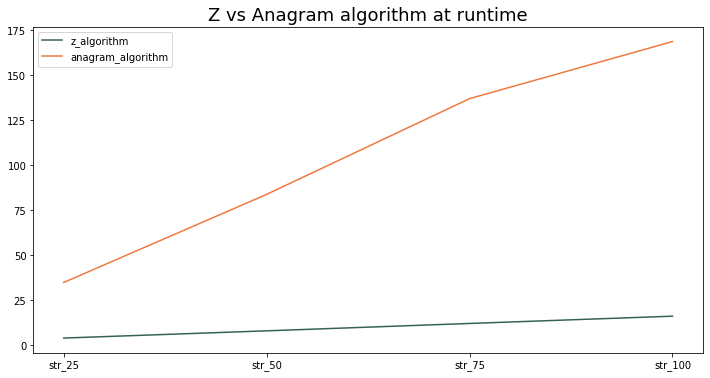

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(str_names, z_mean, color=colors[1])
ax.plot(str_names, anagram_mean, color=colors[2])
ax.legend(["z_algorithm", "anagram_algorithm"])
ax.set_title("Z vs Anagram algorithm at runtime", loc='center', fontsize=18)

In [27]:
print(z_results)
print(anagram_results)

[[4.077024698257446, 3.987475872039795, 3.939776659011841, 4.086171627044678, 3.8956310749053955], [8.068440914154053, 8.054075241088867, 8.026257991790771, 8.03725814819336, 7.881819725036621], [12.214511394500732, 12.076282501220703, 11.986735582351685, 12.080434322357178, 12.199264526367188], [16.48884868621826, 15.906773090362549, 16.21805691719055, 16.05858087539673, 16.093034744262695]]
[[31.923819303512573, 31.777255535125732, 31.479248523712158, 46.50991225242615, 32.796366930007935], [83.20995497703552, 106.24009084701538, 61.662890911102295, 105.41307973861694, 62.595078468322754], [113.8383309841156, 185.4897997379303, 160.0959987640381, 124.76970195770264, 100.75401759147644], [210.56526589393616, 143.05619049072266, 186.03842186927795, 152.3492820262909, 151.41653966903687]]
